# Visualizing Earnings Based on College Majors

Working with ***recent-grads.csv*** dataset.  Some important columns below:

* Rank - Rank by median earnings (the dataset is ordered by this column).
* Major_code - Major code.
* Major - Major description.
* Major_category - Category of major.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) of full-time.
* Men - Male graduates.
* Women - Female graduates.
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.
* Low_wage_jobs - Number in low-wage service jobs.
* Full_time - Number employed 35 hours or more.
* Part_time - Number employed less than 35 hours.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

recent_grads = pd.read_csv("recent-grads.csv")

first_row = recent_grads.iloc[0]

print(recent_grads.head())
print(recent_grads.tail())
print(recent_grads.describe())

   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  \
0   2057.0    282.0    Engineering    0.120564           36      1976   
1    679.0     77.0    Engineering    0.101852            7       640   
2    725.0    131.0    Engineering    0.153037            3       648   
3   1123.0    135.0    Engineering    0.107313           16       758   
4  21239.0  11021.0    Engineering    0.341631          289     25694   

       ...        Part_time  Full_time_year_round  Unemployed  \
0      ...              270                  

In [2]:
#Drop null rows
raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna()
cleaned_data_count =recent_grads.shape[0]

print("%i %i" % (raw_data_count,cleaned_data_count))


173 172


Text(0.5,1,'Median by sample_size')

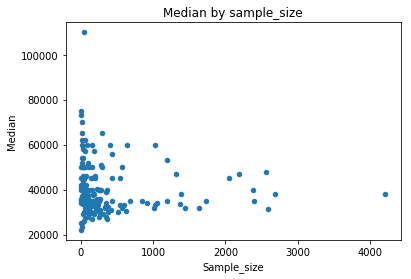

In [3]:
ax1 = recent_grads.plot(x="Sample_size",y="Median",kind="scatter")
ax1.set_title("Median by sample_size")

Text(0.5,1,'Unemployment_rate by sample_size')

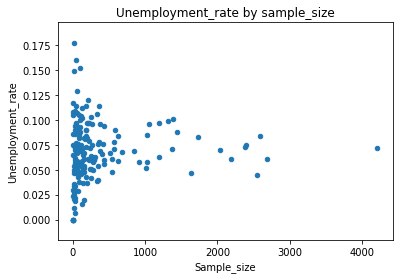

In [4]:
ax2 = recent_grads.plot(x="Sample_size",y="Unemployment_rate",kind="scatter")
ax2.set_title("Unemployment_rate by sample_size")

Text(0.5,1,'Median by Full_time')

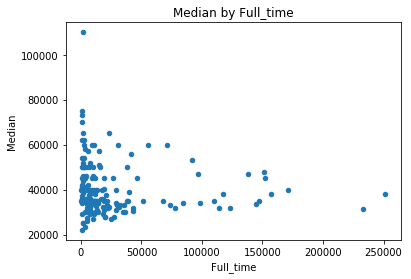

In [5]:
ax3 = recent_grads.plot(x="Full_time",y="Median",kind="scatter")
ax3.set_title("Median by Full_time")

Text(0.5,1,'Unemployment_rate by Share_women')

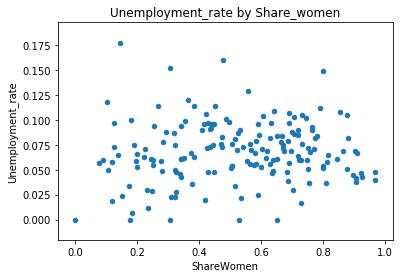

In [6]:
ax4 = recent_grads.plot(x="ShareWomen",y="Unemployment_rate",kind="scatter")
ax4.set_title("Unemployment_rate by Share_women")

Text(0.5,1,'Median by Men')

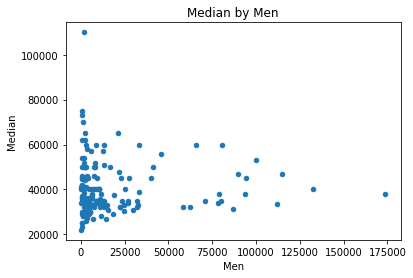

In [7]:
ax5 = recent_grads.plot(x="Men",y="Median",kind="scatter")
ax5.set_title("Median by Men")

Text(0.5,1,'Median by Women')

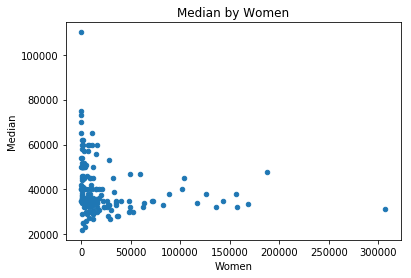

In [8]:
ax6 = recent_grads.plot(x="Women",y="Median",kind="scatter")
ax6.set_title("Median by Women")

Text(0.5,1,'Median salary by total number of graduates')

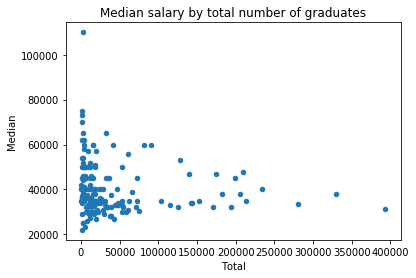

In [9]:
ax7 = recent_grads.plot(x="Total",y="Median",kind="scatter")
ax7.set_title("Median salary by total number of graduates")

### More popular majors do not make more money

Text(0.5,1,'Median salary by percentage women')

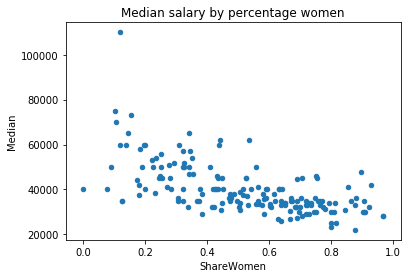

In [10]:
ax8 = recent_grads.plot(x="ShareWomen",y="Median",kind="scatter")
ax8.set_title("Median salary by percentage women")

### There is a slight negative correlation between majors with higher percentages of female graduates and salary

Text(0.5,1,'Median salary by percent of graduates that found full-time work')

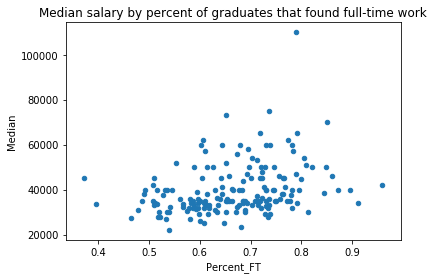

In [11]:
recent_grads["Percent_FT"] = recent_grads["Full_time"]/recent_grads["Total"]

ax9 = recent_grads.plot(x="Percent_FT",y="Median",kind="scatter")
ax9.set_title("Median salary by percent of graduates that found full-time work")

### There is a weak positive association between percent of graduates in a major that are full-time and median salary

Text(0.5,1,'Sample size')

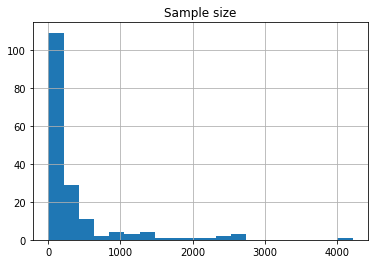

In [12]:
ax = recent_grads["Sample_size"].hist(bins=20)
ax.set_title("Sample size")

Text(0.5,1,'Median Salary')

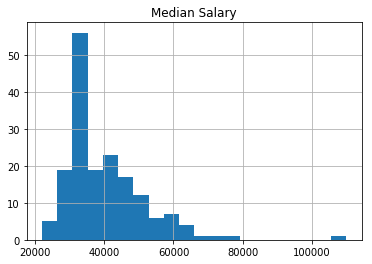

In [13]:
ax = recent_grads["Median"].hist(bins=20)
ax.set_title("Median Salary")

Text(0.5,1,'Median Salary cutting out outlies')

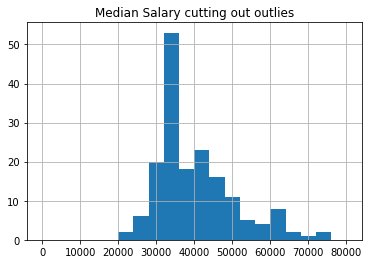

In [14]:
ax = recent_grads["Median"].hist(bins=20,range=(0,80000))
ax.set_title("Median Salary cutting out outlies")

### Majority of median salaries range between \$25000 and \$50000

Text(0.5,1,'Number of grads in a major that are employed')

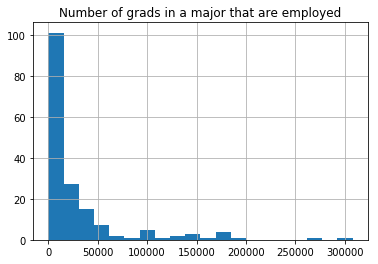

In [15]:
ax = recent_grads["Employed"].hist(bins=20)
ax.set_title("Number of grads in a major that are employed")

Text(0.5,1,'Number of recent grads in a major that are full-time')

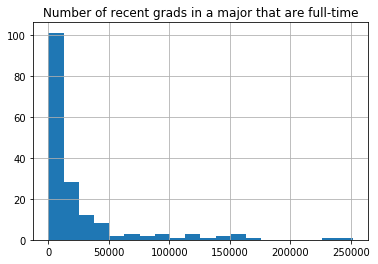

In [16]:
ax = recent_grads["Full_time"].hist(bins=20)
ax.set_title("Number of recent grads in a major that are full-time")

Text(0.5,1,'Percentage of women in each major')

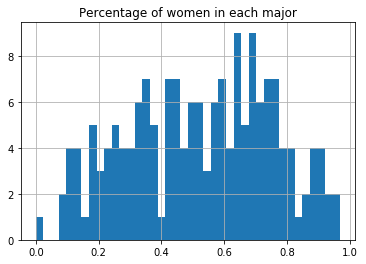

In [17]:
ax = recent_grads["ShareWomen"].hist(bins=40)
ax.set_title("Percentage of women in each major")

Text(0.5,1,'Unemployment rates')

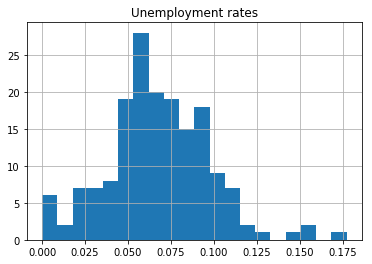

In [18]:
ax = recent_grads["Unemployment_rate"].hist(bins=20)
ax.set_title("Unemployment rates")

Text(0.5,1,'Number of male graduates')

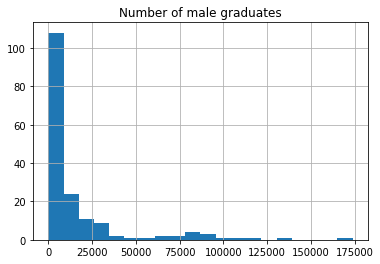

In [19]:
ax = recent_grads["Men"].hist(bins=20)
ax.set_title("Number of male graduates")

Text(0.5,1,'Number of female graduates')

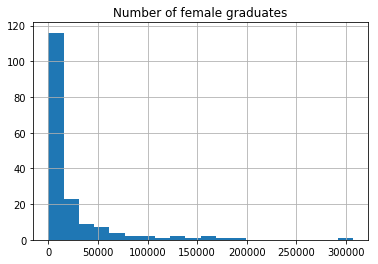

In [20]:
ax = recent_grads["Women"].hist(bins=20)
ax.set_title("Number of female graduates")

Text(0.5,1,'Median Salary')

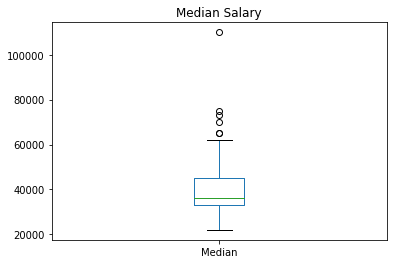

In [21]:
ax = recent_grads["Median"].plot.box()
ax.set_title("Median Salary")

Text(0.5,1,'Percentage of female graduates in each major')

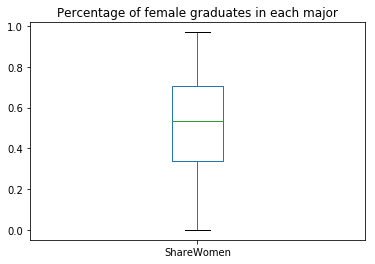

In [22]:
ax = recent_grads["ShareWomen"].plot.box()
ax.set_title("Percentage of female graduates in each major")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112483550>,
      dtype=object)

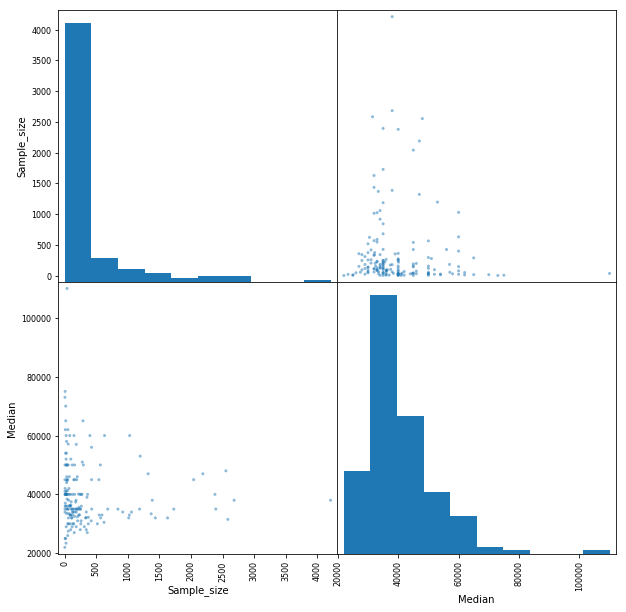

In [23]:
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[["Sample_size","Median"]],figsize=(10,10))



Text(0.5,0,'Median')

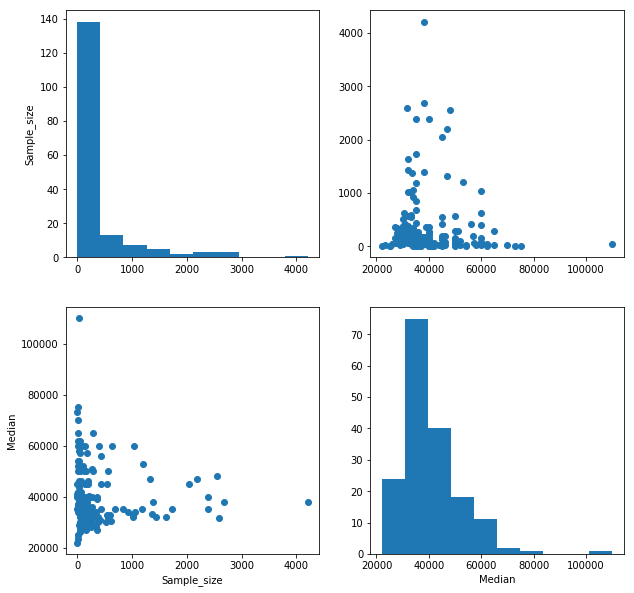

In [24]:
# making my own scatter plot

def rotate_ticks(tick):
    tick.set_rotation(90)
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.hist(recent_grads["Sample_size"])
ax1.set_ylabel("Sample_size")
ax2.scatter(recent_grads["Median"],recent_grads["Sample_size"])
ax3.scatter(recent_grads["Sample_size"],recent_grads["Median"])
ax3.set_xlabel("Sample_size")
ax3.set_ylabel("Median")
ax4.hist(recent_grads["Median"])
ax4.set_xlabel("Median")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1126b7940>,
      dtype=object)

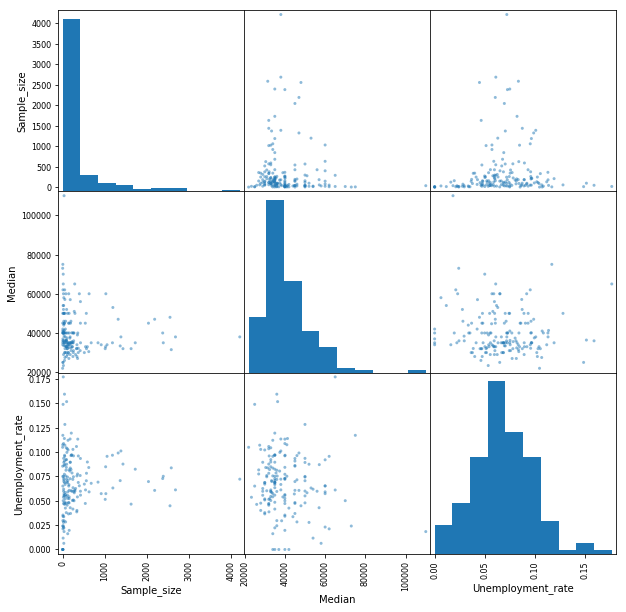

In [25]:
scatter_matrix(recent_grads[["Sample_size", "Median", "Unemployment_rate"]],figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11311b080>,
      dtype=object)

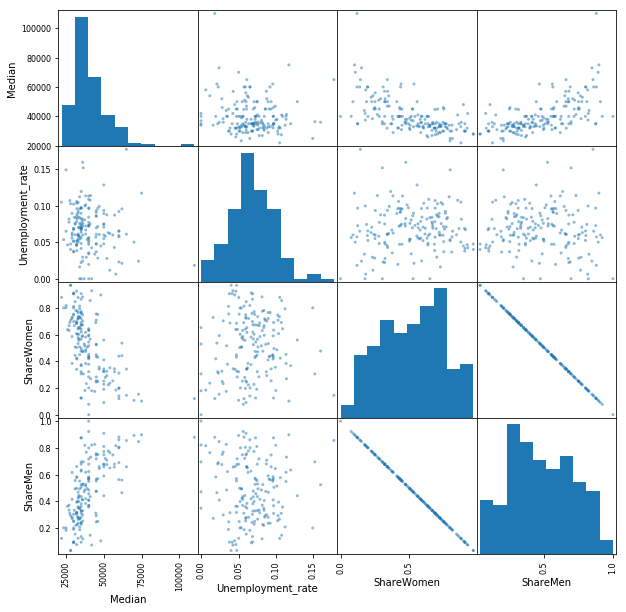

In [26]:
recent_grads["ShareMen"] = 1- recent_grads["ShareWomen"]

scatter_matrix(recent_grads[["Median","Unemployment_rate","ShareWomen","ShareMen"]],figsize=[10,10])

## Percentage of male/female graduates in a major mapped to unemployment_rate and median income

* Unemployment rates do not vary by percentage of female/male graduates in a major
* There is a positive association between median income and percentage of male graduates in a major

Text(0,0.5,'Percentage of women in the major')

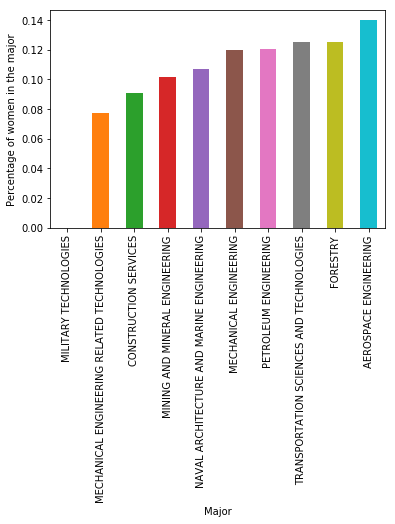

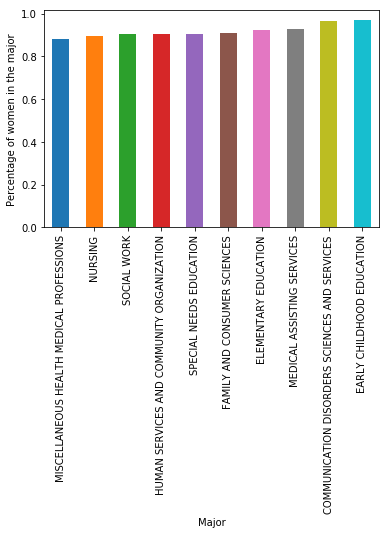

In [27]:
sorted_df = recent_grads.sort_values("ShareWomen")

ax = sorted_df[:10].plot.bar(x="Major",y="ShareWomen",legend=False)
ax.set_ylabel("Percentage of women in the major")
ax = sorted_df[-10:].plot.bar(x="Major",y="ShareWomen", legend=False)
ax.set_ylabel("Percentage of women in the major")

Text(0,0.5,'Unemployment rate')

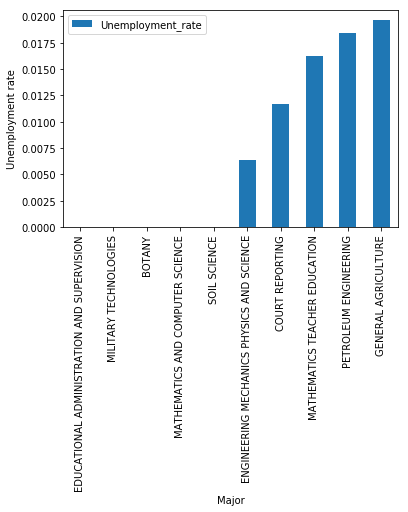

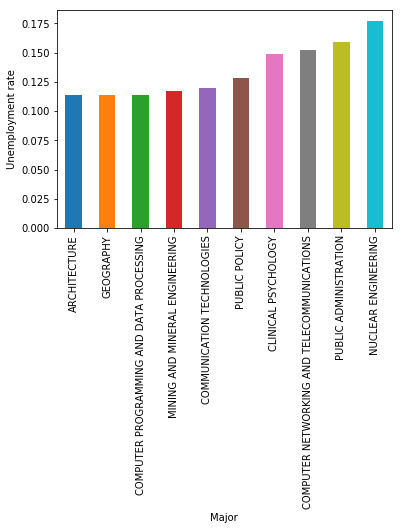

In [47]:
sorted_df = recent_grads.sort_values("Unemployment_rate")
sorted_df[:10][["Major","Unemployment_rate"]].plot.bar(x="Major").set_ylabel("Unemployment rate")
sorted_df[-10:].plot.bar(x="Major",y="Unemployment_rate",legend=False).set_ylabel("Unemployment rate")

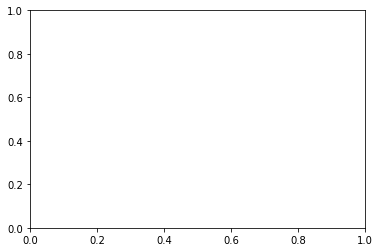

In [50]:
cols = ["Median","Unemployment_rate"]

fig,ax = plt.subplots()
ax1.boxplot(recent_grads[["Median","Unemployment_rate"]])

plt.show()


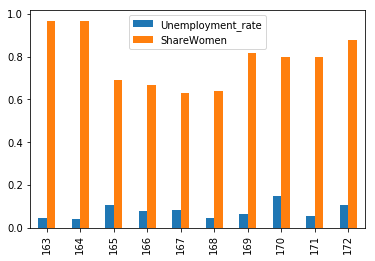

In [59]:
recent_grads[-10:][["Unemployment_rate","ShareWomen"]].plot.bar()

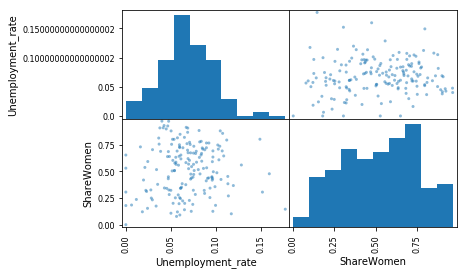

In [74]:
axes = scatter_matrix(recent_grads[["Unemployment_rate","ShareWomen"]])

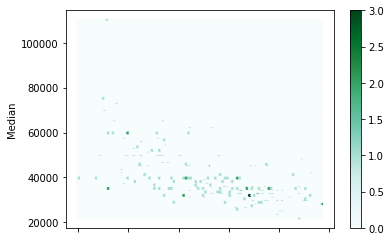

In [77]:
recent_grads.plot.hexbin(x="ShareWomen",y="Median")